In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

https://www.kaggle.com/ravijeetkr/customer-life-time-value-prediction

In [2]:
df = pd.read_csv('cltv_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df['effective_to_month'] = df['Effective To Date'].dt.month
df['effective_to_year'] = df['Effective To Date'].dt.year

In [7]:
## Making date features categorical

df['effective_to_month'] = df['effective_to_month'].astype('string')
df['effective_to_year'] = df['effective_to_year'].astype('string')

In [8]:
categorical = df[['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Location Code', 'Policy', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'effective_to_month', 'effective_to_year']].copy()

In [9]:
categorical.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Marital Status,Location Code,Policy,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,effective_to_month,effective_to_year
0,Washington,No,Basic,Bachelor,Employed,F,Married,Suburban,Corporate L3,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Single,Suburban,Personal L3,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Married,Suburban,Personal L3,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
3,California,No,Basic,Bachelor,Unemployed,M,Married,Suburban,Corporate L2,Corporate Auto,Offer1,Call Center,SUV,Medsize,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Single,Rural,Personal L1,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2,2011


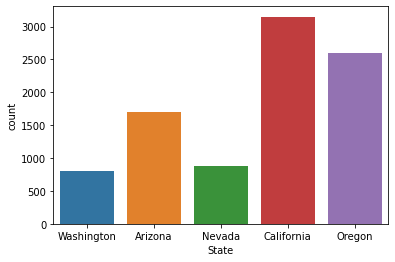

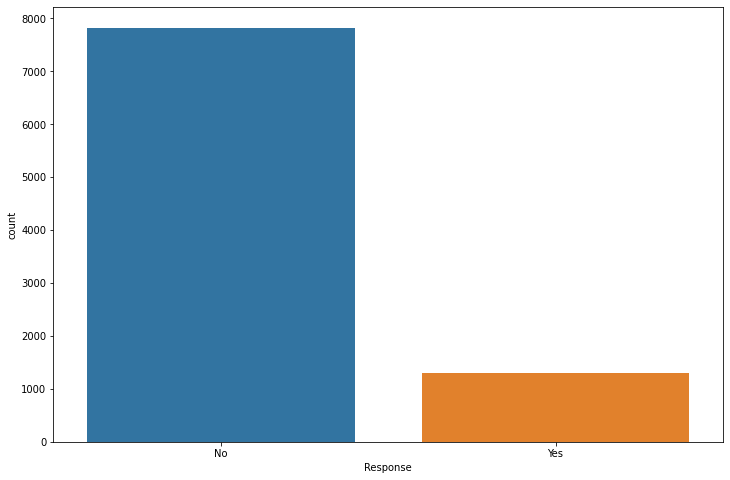

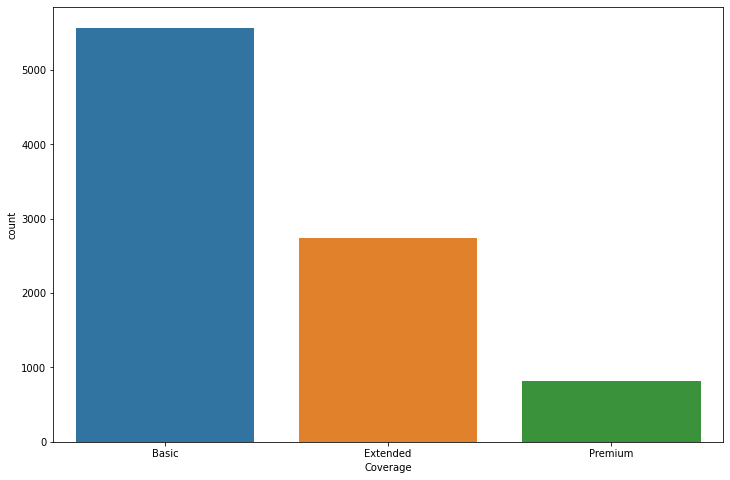

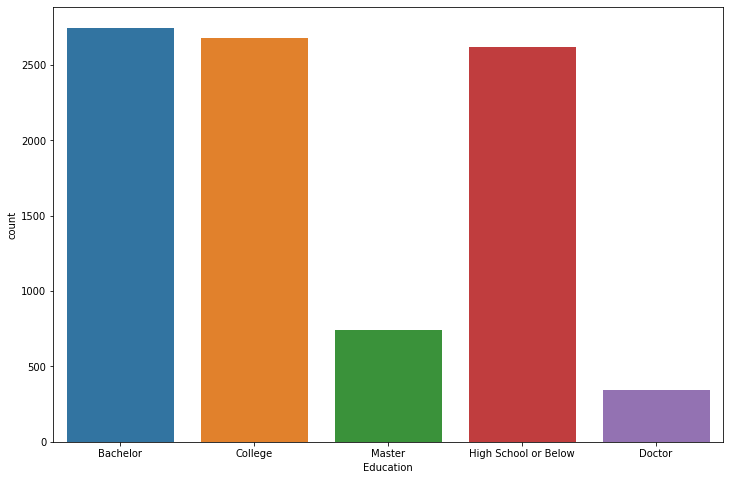

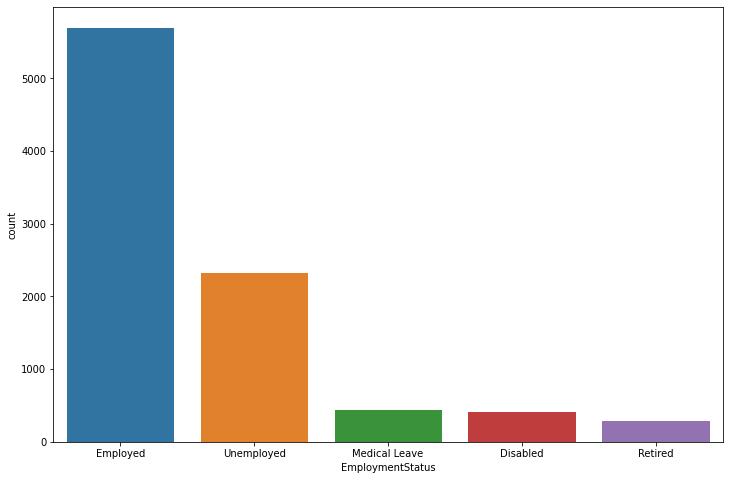

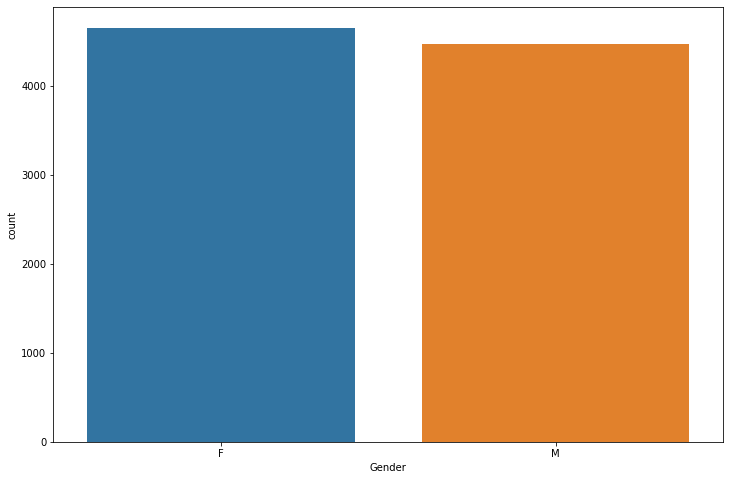

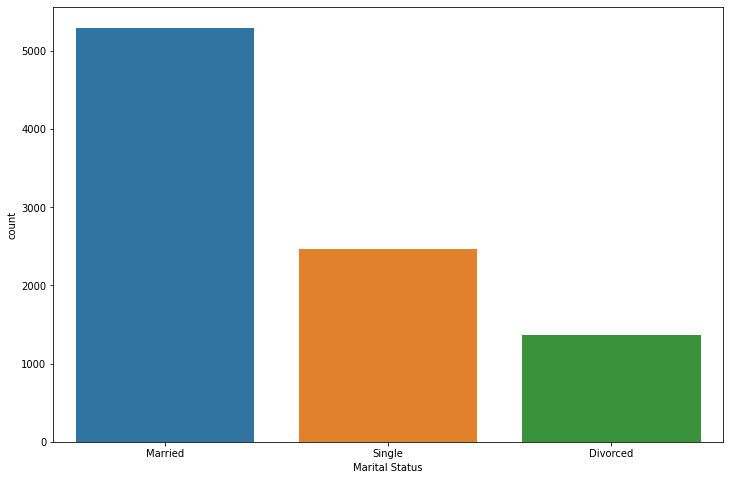

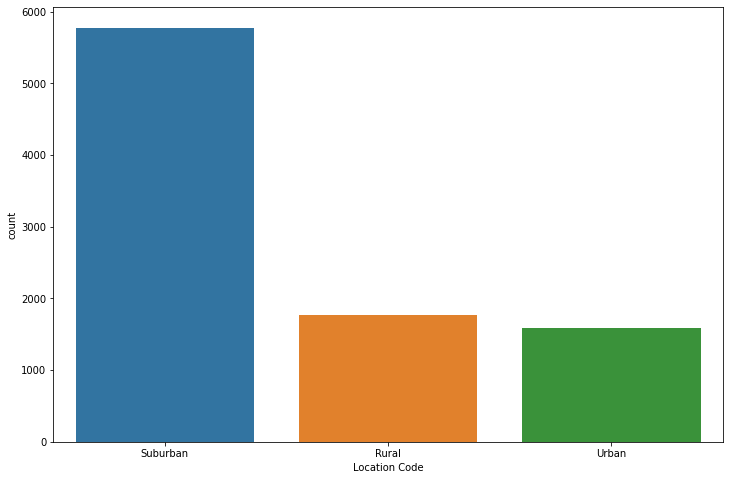

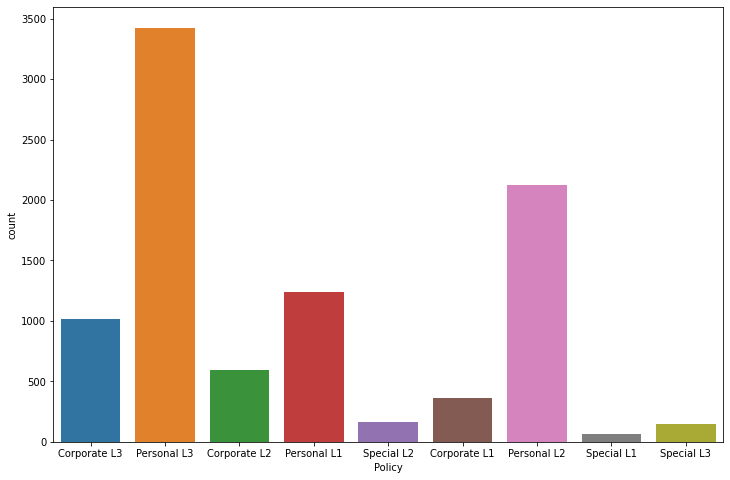

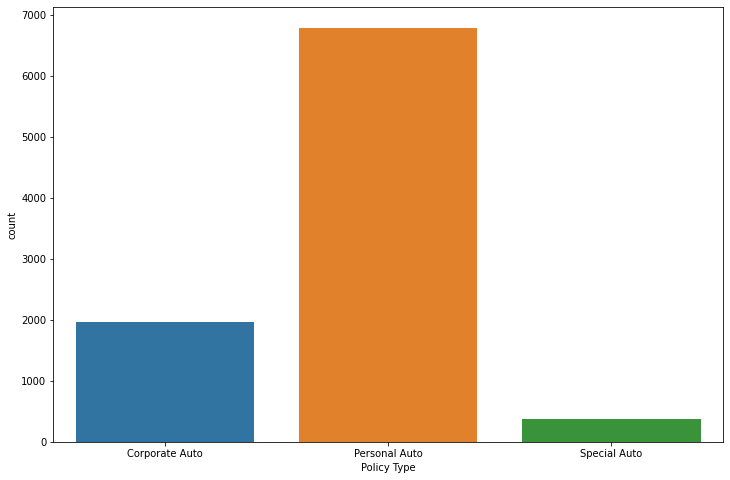

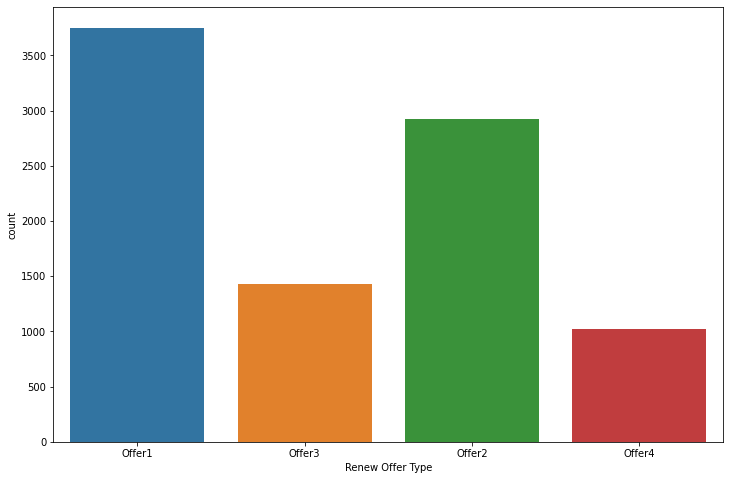

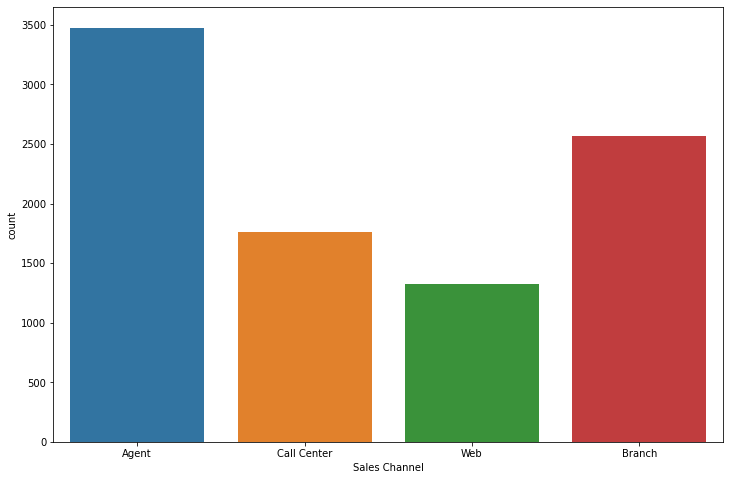

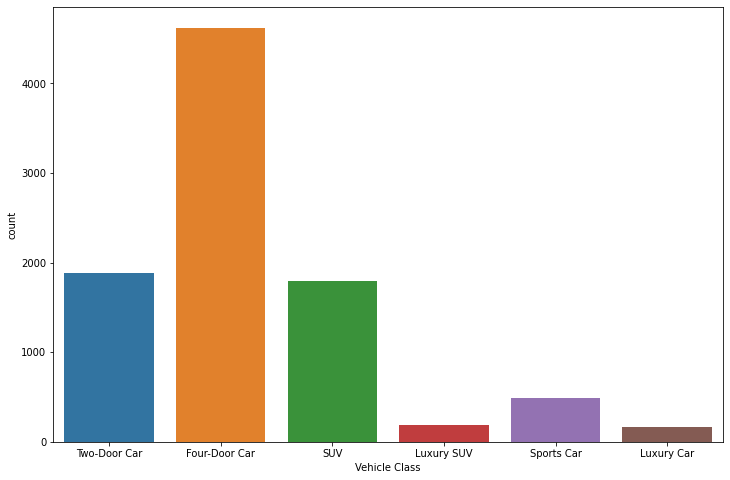

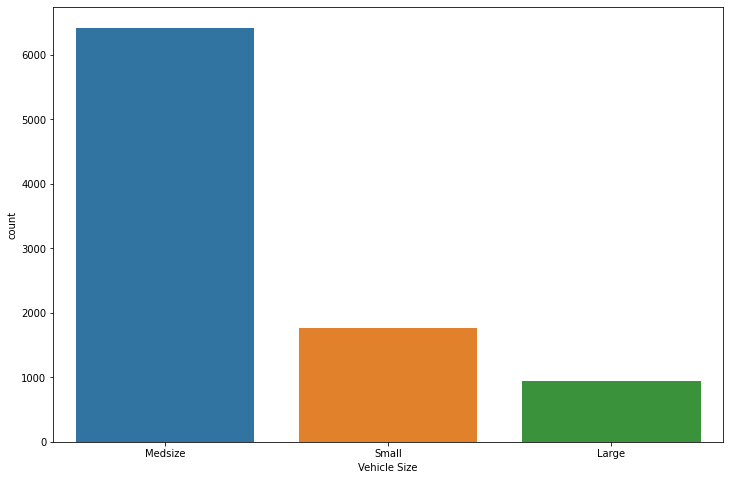

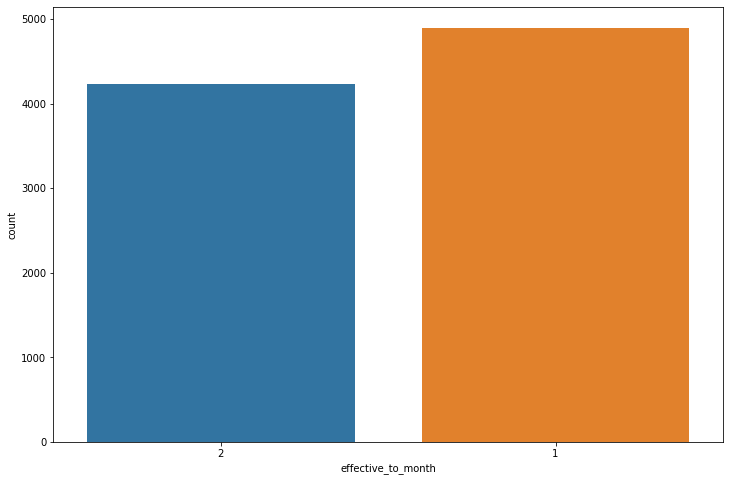

<Figure size 864x576 with 0 Axes>

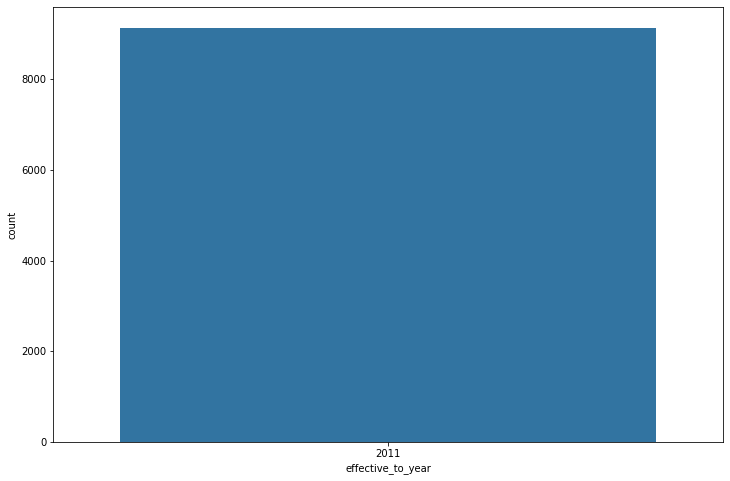

In [10]:
for i, col in enumerate(categorical.columns):  
    plt.figure(figsize=(12,8))
    plt.figure(i)
    sns.countplot(x=col, data=categorical)

In [11]:
## Create Pred Matrix and Normalize

y = df.pop('Customer Lifetime Value')

X = df.copy()
X = X.drop('Effective To Date', axis=1)
X = X.drop('Customer', axis=1)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

In [13]:
X = X.drop('Monthly Premium Auto', axis=1)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Months Since Last Claim        9134 non-null   int64  
 10  Months Since Policy Inception  9134 non-null   int64  
 11  Number of Open Complaints      9134 non-null   int64  
 12  Number of Policies             9134 non-null   i

In [15]:
X = pd.get_dummies(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Colliniarity Check

In [18]:
X['effective_to_month'] = X['effective_to_month'].astype(int)
X['effective_to_year'] = X['effective_to_year'].astype(int)

In [19]:
X_vif = add_constant(X)

In [20]:
vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)

/root/venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [21]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [22]:
print_full(vif)

Income                            3.182668
Months Since Last Claim           1.010230
Months Since Policy Inception     1.021980
Number of Open Complaints         1.009120
Number of Policies                1.019271
Total Claim Amount                4.137478
effective_to_month                1.006442
effective_to_year                 0.000000
State_Arizona                          inf
State_California                       inf
State_Nevada                           inf
State_Oregon                           inf
State_Washington                       inf
Response_No                            inf
Response_Yes                           inf
Coverage_Basic                         inf
Coverage_Extended                      inf
Coverage_Premium                       inf
Education_Bachelor                     inf
Education_College                      inf
Education_Doctor                       inf
Education_High School or Below         inf
Education_Master                       inf
EmploymentS

## Models

### Model 1 - Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression().fit(X_train, y_train)
r2 = reg.score(X_test, y_test)

cv_scores = cross_val_score(reg, X_test, y_test, cv=5)
print("Your r2 Test Score is: ", r2)
print("Your CV Scores are: ", cv_scores)
print("Your Mean CV Score is: ", np.mean(cv_scores))

Your r2 Test Score is:  0.16676830934852116
Your CV Scores are:  [0.07498176 0.14098525 0.06244966 0.14724175 0.16300108]
Your Mean CV Score is:  0.11773189949152882


In [24]:
reg.predict(X_test[21].reshape(1, -1))

array([13675.06405622])

In [25]:
Xstd = scaler.fit_transform(X)
reg_full = LinearRegression().fit(Xstd, y)
reg_preds = reg_full.predict(Xstd)
df['reg_cltv_preds'] = reg_preds

In [26]:
df['cltv_ground_truth'] = y

In [27]:
y_pred = reg.predict(X_test)

ols_mae = mean_absolute_error(y_test, y_pred)
print(ols_mae)

3824.1491377071357


### Model 2 - ElasticNet + GridSearch

In [28]:
# Move import up top

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [29]:
model_enet = ElasticNet(alpha=0.1, l1_ratio=0.9)

model_enet.fit(X_train, y_train)
cv_score = cross_val_score(model_enet, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(model_enet, X_train, y_train, cv=5))
training_score = model_enet.score(X_train, y_train)
test_score = model_enet.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.16377685701615585
Cross validation scores:  [0.10168862 0.16918798 0.1347652  0.18552382 0.15900495]
Your Mean CV Score:  0.15003411374798245
Test Score:  0.16481718940658285


In [30]:
model_enet.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [31]:
# fill the dictionary of parameters
gs_params = {'l1_ratio': np.linspace(0, 1, 50), 'alpha': np.linspace(0, 1, 50)}

gridsearch = GridSearchCV(model_enet, gs_params, n_jobs=2, cv=5, verbose=2)

In [32]:
# Run gridsearch

#gridsearch.fit(X_train, y_train)

In [33]:
#print("The best parameters are %s with a score of %0.2f" % (gridsearch.best_params_, gridsearch.best_score_))

In [34]:
model_enet2 = ElasticNet(alpha=1.0, l1_ratio=1.0)

model_enet2.fit(X_train, y_train)
cv_score = cross_val_score(model_enet2, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(model_enet2, X_train, y_train, cv=5))
training_score = model_enet2.score(X_train, y_train)
test_score = model_enet2.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+08, tolerance: 3.490e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+08, tolerance: 2.881e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of t

In [35]:
y_pred = model_enet2.predict(X_test)

model_enet_mae = mean_absolute_error(y_test, y_pred)
print(model_enet_mae)

3836.033104882058


## Model 3 - Bayesian Ridge Regression

In [36]:
from sklearn import linear_model

bayreg = linear_model.BayesianRidge()

In [37]:
bayreg.fit(X_train, y_train)
cv_score = cross_val_score(bayreg, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(bayreg, X_train, y_train, cv=5))
training_score = bayreg.score(X_train, y_train)
test_score = bayreg.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.16347129959945628
Cross validation scores:  [0.10407927 0.16955618 0.13606169 0.18459057 0.15725699]
Your Mean CV Score:  0.15030893775331694
Test Score:  0.1644809742186435


In [38]:
bayreg.get_params().keys()

dict_keys(['alpha_1', 'alpha_2', 'alpha_init', 'compute_score', 'copy_X', 'fit_intercept', 'lambda_1', 'lambda_2', 'lambda_init', 'n_iter', 'normalize', 'tol', 'verbose'])

In [39]:
# fill the dictionary of parameters
gs_params = {'alpha_1': np.linspace(0, 1, 20), 'alpha_2': np.linspace(0, 1, 20), 'lambda_1': np.linspace(0, 1, 20), 'lambda_2': np.linspace(0, 1, 20)}

gridsearch = GridSearchCV(bayreg, gs_params, n_jobs=-1, cv=5, verbose=2)

In [40]:
#gridsearch.fit(X_train, y_train)

https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp

In [41]:
y_pred = bayreg.predict(X_test)

bayreg_mae = mean_absolute_error(y_test, y_pred)

In [42]:
print(bayreg_mae)

3835.565190070002


## Model 4 - Passive Aggressive Regressor

In [43]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [44]:
pass_regr = PassiveAggressiveRegressor(max_iter=1000, random_state=0, tol=1e-7, C=1.0)
pass_regr.fit(X_train, y_train)


PassiveAggressiveRegressor(random_state=0, tol=1e-07)

In [45]:
print(pass_regr.coef_)

[  70.70511843  -48.17857962  -44.77852763 -113.25323214  933.57032949
   49.25440474  -18.99603143    0.          -12.67912267   68.49377355
  -43.93027664   26.52819403  -94.04773502   22.97032505  -22.97032505
 -449.93498096   89.53343054  622.23697569  -34.697457    -25.06946565
    1.54262709   64.13245329   -6.82109095   30.47292945   77.9421261
   -9.89029546    5.75975519  -98.89459497  -40.52990888   40.52990888
  -16.17728368   12.16181063    1.4048155    88.02192292   38.67118685
 -113.74244172    9.95701033   -3.47631721  -12.7944082    53.65133699
  -59.15437179   26.21453493   14.12573385   13.33771924  -25.01376575
   30.6758888   -21.53442565  -18.6803118   219.64026209 -159.77794004
   32.14628507 -142.3187043   -69.50896532    9.55257274   78.74648344
   -4.87211319 -701.84652855  904.47293051  916.92668792  692.67405659
  258.06706817 -573.54365883  -29.24744188   32.02783533  -14.53309868]


In [46]:
cv_score = cross_val_score(pass_regr, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(pass_regr, X_train, y_train, cv=5))
training_score = pass_regr.score(X_train, y_train)
test_score = pass_regr.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.04403169320171274
Cross validation scores:  [-0.01215483  0.06023318  0.03263171  0.07383318  0.05674465]
Your Mean CV Score:  0.04225757822806171
Test Score:  0.05404936433343843


In [47]:
y_pred = pass_regr.predict(X_test)

passreg_mae = mean_absolute_error(y_test, y_pred)
print(passreg_mae)

3379.461901587401


## Model 5 - Huber Regressor

In [48]:
from sklearn.linear_model import HuberRegressor

In [49]:
# Huber works very well with Outliers. This is the leading model - provide more context to Huber.

In [50]:
huber = HuberRegressor().fit(X_train, y_train)

y_pred = huber.predict(X_test)

huber_mae = mean_absolute_error(y_test, y_pred)
print(huber_mae)

3396.6306325112305


In [51]:
cv_score = cross_val_score(huber, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(huber, X_train, y_train, cv=5))
training_score = huber.score(X_train, y_train)
test_score = huber.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.06665627437570965
Cross validation scores:  [0.01736002 0.07586983 0.04979067 0.09275529 0.07107316]
Your Mean CV Score:  0.06136979502027342
Test Score:  0.07501080372960467


## Model 6 - Random Sample Consensus Regressor

In [52]:
from sklearn.linear_model import RANSACRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor

In [53]:
ransac_reg = RANSACRegressor(random_state=0, max_trials=1100).fit(X_train, y_train)

y_pred = ransac_reg.predict(X_test)

ransac_mae = mean_absolute_error(y_test, y_pred)
print(ransac_mae)

819418158859644.9


## Model 7 - SGD Regressor

In [54]:
from sklearn.linear_model import SGDRegressor

In [55]:
sgd_reg = SGDRegressor(max_iter=3000, tol=None, penalty='elasticnet', l1_ratio=1, learning_rate='invscaling').fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)

sgd_mae = mean_absolute_error(y_test, y_pred)
print(sgd_mae)

3828.2554242544484


## Tensorflow Regressor

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [57]:
X_train[2].shape

(65,)

In [58]:
input_layer = Input(shape=(66,))
x1 = Dense(500, activation='linear')(input_layer)
x2 = Dense(500, activation='linear')(x1)
output = Dense(1, activation='linear')(x2)

regr_tf = Model(inputs=input_layer, outputs=output)

In [59]:
# Trying different model topologies to see which achieves better results

input_layer = Input(shape=(66,))
x1 = Dense(1000, activation='linear')(input_layer)
x2 = Dense(1000, activation='linear')(x1)
x3 = Dense(1000, activation='linear')(x2)
output = Dense(1, activation='linear')(x3)

regr_tf = Model(inputs=input_layer, outputs=output)

In [60]:
# Worth trying reduce_lr_on_plateau callback as well

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [61]:
regr_tf.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [62]:
#regr_tf.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

## Model Analysis

In [63]:
test_scores = pd.DataFrame({'ols': ols_mae,
'elasticnet': model_enet_mae,
'bayesian_reg': bayreg_mae,
'pass_agg': passreg_mae,
'huber': huber_mae,
'ransac' : ransac_mae,
'sgd' : sgd_mae},
index=['Mean_Absolute_Errors'])

In [64]:
test_scores

,ols,elasticnet,bayesian_reg,pass_agg,huber,ransac,sgd
Mean_Absolute_Errors,3824.149138,3836.033105,3835.56519,3379.461902,3396.630633,8.194182e+14,3828.255424


In [65]:
test_scores = test_scores.T

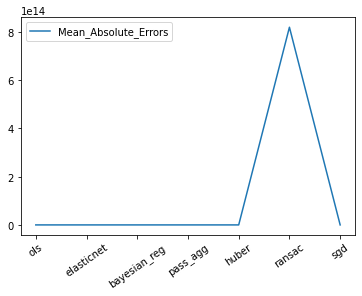

In [66]:
test_scores.plot()
plt.xticks(rotation=35)
plt.show()

In [67]:
pass_regr.coef_

array([  70.70511843,  -48.17857962,  -44.77852763, -113.25323214,
        933.57032949,   49.25440474,  -18.99603143,    0.        ,
        -12.67912267,   68.49377355,  -43.93027664,   26.52819403,
        -94.04773502,   22.97032505,  -22.97032505, -449.93498096,
         89.53343054,  622.23697569,  -34.697457  ,  -25.06946565,
          1.54262709,   64.13245329,   -6.82109095,   30.47292945,
         77.9421261 ,   -9.89029546,    5.75975519,  -98.89459497,
        -40.52990888,   40.52990888,  -16.17728368,   12.16181063,
          1.4048155 ,   88.02192292,   38.67118685, -113.74244172,
          9.95701033,   -3.47631721,  -12.7944082 ,   53.65133699,
        -59.15437179,   26.21453493,   14.12573385,   13.33771924,
        -25.01376575,   30.6758888 ,  -21.53442565,  -18.6803118 ,
        219.64026209, -159.77794004,   32.14628507, -142.3187043 ,
        -69.50896532,    9.55257274,   78.74648344,   -4.87211319,
       -701.84652855,  904.47293051,  916.92668792,  692.67405

In [68]:
pass_agg_feat_imp = pd.DataFrame(data=pass_regr.coef_, index=X.columns, columns=["feature_importance"])

In [69]:
pass_agg_feat_imp.sort_values(by="feature_importance")

,feature_importance
Vehicle Class_Four-Door Car,-701.846529
Vehicle Class_Two-Door Car,-573.543659
Coverage_Basic,-449.934981
Renew Offer Type_Offer2,-159.777940
Renew Offer Type_Offer4,-142.318704
...,...
Coverage_Premium,622.236976
Vehicle Class_SUV,692.674057
Vehicle Class_Luxury Car,904.472931
Vehicle Class_Luxury SUV,916.926688


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8fd894ed-7cb5-4f70-9097-b20c180a3837' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>